──────────────────────────────────────────────── TSLA Performance ─────────────────────────────────────────────────

Mock Trading Results ────────────────────────────────────────

┌──────────────────────┬──────────────────────────────────────────────────────────────┐
│ Field                │ Value                                                        │
├──────────────────────┼──────────────────────────────────────────────────────────────┤
│ Strategy             │ 12 EMA / 34 EMA Crossover (filtered+risk+trailing+execution) │
├──────────────────────┼──────────────────────────────────────────────────────────────┤
│ Initial capital      │ $10,000.00                                                   │
├──────────────────────┼──────────────────────────────────────────────────────────────┤
│ Final capital        │ $10,163.44                                                   │
├──────────────────────┼──────────────────────────────────────────────────────────────┤
│ Net P&L              │ $163.44                                                      │
├──────────────────────┼──────────────────────────────────────────────────────────────┤
│ Total fees           │ $13.85                                                       │
├──────────────────────┼──────────────────────────────────────────────────────────────┤
│ Return %             │ 1.63%                                                        │
├──────────────────────┼──────────────────────────────────────────────────────────────┤
│ Trades               │ 7                                                            │
├──────────────────────┼──────────────────────────────────────────────────────────────┤
│ Winning trades       │ 5                                                            │
├──────────────────────┼──────────────────────────────────────────────────────────────┤
│ Losing trades        │ 2                                                            │
├──────────────────────┼──────────────────────────────────────────────────────────────┤
│ Win rate             │ 71.43%                                                       │
├──────────────────────┼──────────────────────────────────────────────────────────────┤
│ Average trade return │ 0.24%                                                        │
└──────────────────────┴──────────────────────────────────────────────────────────────┘

Trades ────────────────────────────────────────

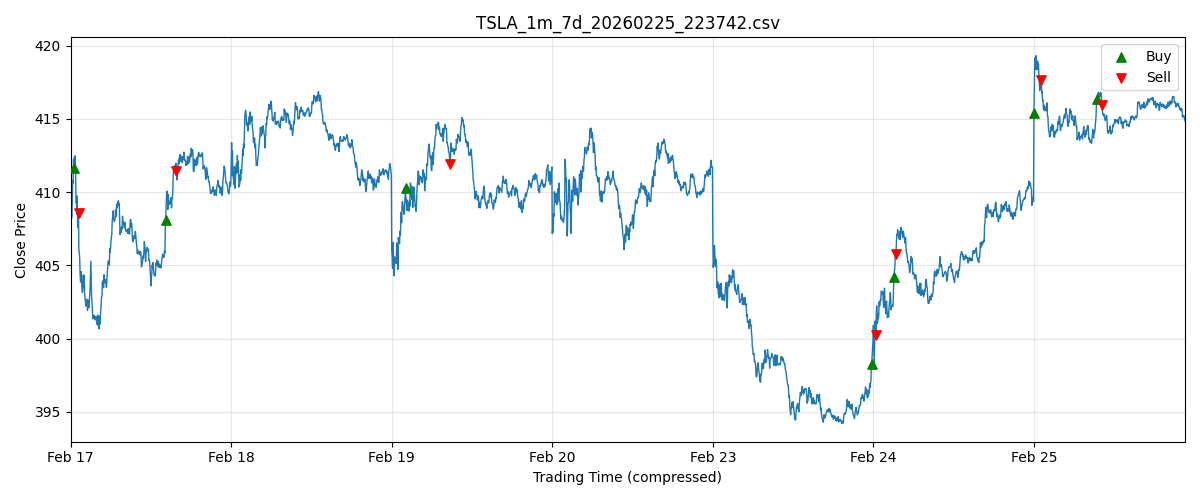

┌───┬──────────────────┬──────────────────┬────────┬────────┬────────┬─────────┬──────────┐
│ # │ Entry Time       │ Exit Time        │ Entry  │ Exit   │ Shares │     P&L │ Return % │
├───┼──────────────────┼──────────────────┼────────┼────────┼────────┼─────────┼──────────┤
│ 1 │ 2026-02-17 09:39 │ 2026-02-17 09:50 │ 411.64 │ 408.56 │     24 │ $-76.03 │   -0.77% │
├───┼──────────────────┼──────────────────┼────────┼────────┼────────┼─────────┼──────────┤
│ 2 │ 2026-02-17 13:22 │ 2026-02-17 13:45 │ 408.11 │ 411.42 │     24 │  $77.33 │    0.79% │
├───┼──────────────────┼──────────────────┼────────┼────────┼────────┼─────────┼──────────┤
│ 3 │ 2026-02-19 10:04 │ 2026-02-19 11:52 │ 410.27 │ 411.93 │     24 │  $37.83 │    0.38% │
├───┼──────────────────┼──────────────────┼────────┼────────┼────────┼─────────┼──────────┤
│ 4 │ 2026-02-23 15:56 │ 2026-02-24 09:37 │ 398.29 │ 400.24 │     25 │  $46.80 │    0.47% │
├───┼──────────────────┼──────────────────┼────────┼────────┼────────┼─────────┼──────────┤
│ 5 │ 2026-02-24 10:21 │ 2026-02-24 10:26 │ 404.19 │ 405.79 │     24 │  $36.46 │    0.38% │
├───┼──────────────────┼──────────────────┼────────┼────────┼────────┼─────────┼──────────┤
│ 6 │ 2026-02-25 09:31 │ 2026-02-25 09:48 │ 415.39 │ 417.69 │     24 │  $53.37 │    0.54% │
├───┼──────────────────┼──────────────────┼────────┼────────┼────────┼─────────┼──────────┤
│ 7 │ 2026-02-25 12:04 │ 2026-02-25 12:16 │ 416.35 │ 415.93 │     24 │ $-12.31 │   -0.12% │
└───┴──────────────────┴──────────────────┴────────┴────────┴────────┴─────────┴──────────┘

───────────────────────────────────────────────── mcd Performance ─────────────────────────────────────────────────

Mock Trading Results ────────────────────────────────────────

┌──────────────────────┬──────────────────────────────────────────────────────────────┐
│ Field                │ Value                                                        │
├──────────────────────┼──────────────────────────────────────────────────────────────┤
│ Strategy             │ 12 EMA / 34 EMA Crossover (filtered+risk+trailing+execution) │
├──────────────────────┼──────────────────────────────────────────────────────────────┤
│ Initial capital      │ $10,000.00                                                   │
├──────────────────────┼──────────────────────────────────────────────────────────────┤
│ Final capital        │ $9,975.98                                                    │
├──────────────────────┼──────────────────────────────────────────────────────────────┤
│ Net P&L              │ $-24.02                                                      │
├──────────────────────┼──────────────────────────────────────────────────────────────┤
│ Total fees           │ $1.99                                                        │
├──────────────────────┼──────────────────────────────────────────────────────────────┤
│ Return %             │ -0.24%                                                       │
├──────────────────────┼──────────────────────────────────────────────────────────────┤
│ Trades               │ 1                                                            │
├──────────────────────┼──────────────────────────────────────────────────────────────┤
│ Winning trades       │ 0                                                            │
├──────────────────────┼──────────────────────────────────────────────────────────────┤
│ Losing trades        │ 1                                                            │
├──────────────────────┼──────────────────────────────────────────────────────────────┤
│ Win rate             │ 0.00%                                                        │
├──────────────────────┼──────────────────────────────────────────────────────────────┤
│ Average trade return │ -0.24%                                                       │
└──────────────────────┴──────────────────────────────────────────────────────────────┘

Trades ────────────────────────────────────────

/Users/kristopherpepper/Documents/jupyterProjects/historicalStockTrader/utils/data/plot_compressed_trading_chart.py:24: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  figure = plt.figure(num=1, figsize=(12, 5), clear=True)


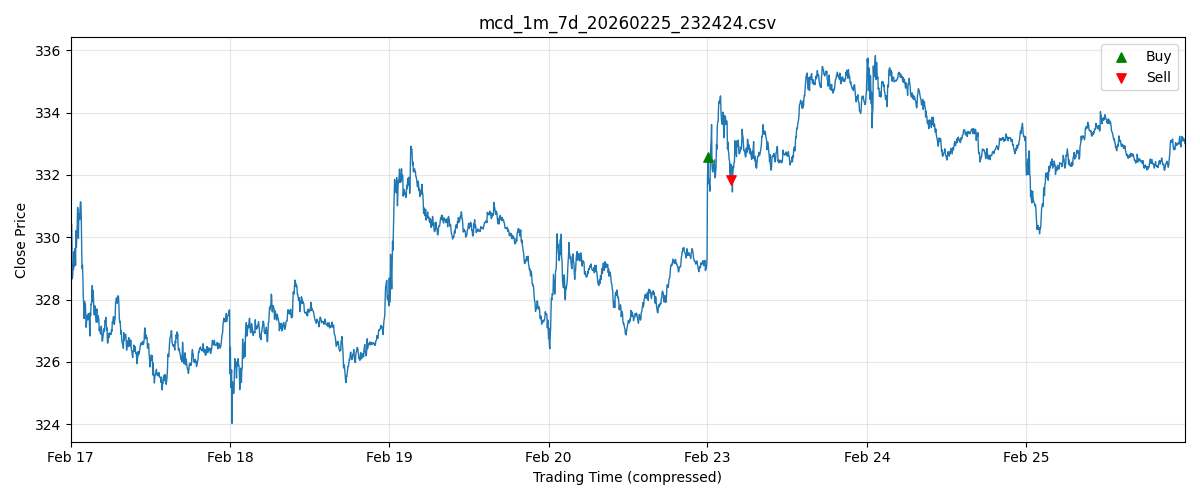

┌───┬──────────────────┬──────────────────┬────────┬────────┬────────┬─────────┬──────────┐
│ # │ Entry Time       │ Exit Time        │ Entry  │ Exit   │ Shares │     P&L │ Return % │
├───┼──────────────────┼──────────────────┼────────┼────────┼────────┼─────────┼──────────┤
│ 1 │ 2026-02-23 09:32 │ 2026-02-23 10:27 │ 332.57 │ 331.84 │     30 │ $-24.02 │   -0.24% │
└───┴──────────────────┴──────────────────┴────────┴────────┴────────┴─────────┴──────────┘

──────────────────────────────────────────── TSLA SOURCE DATA OVERVIEW ────────────────────────────────────────────

File Metadata ────────────────────────────────────────

┌────────────────────────┬────────────────────────────────────────────────────────────────────────────────────────┐
│ Field                  │ Value                                                                                  │
├────────────────────────┼────────────────────────────────────────────────────────────────────────────────────────┤
│ File name              │ TSLA_1m_7d_20260225_223742.csv                                                         │
├────────────────────────┼────────────────────────────────────────────────────────────────────────────────────────┤
│ Export timestamp token │ 20260225_223742                                                                        │
├────────────────────────┼────────────────────────────────────────────────────────────────────────────────────────┤
│ Exported at            │ 2026-02-25 22:37:42                                                                    │
├────────────────────────┼────────────────────────────────────────────────────────────────────────────────────────┤
│ Export date            │ 2026-02-25                                                                             │
├────────────────────────┼────────────────────────────────────────────────────────────────────────────────────────┤
│ Export time            │ 22:37:42                                                                               │
├────────────────────────┼────────────────────────────────────────────────────────────────────────────────────────┤
│ File age               │ 1:03:12.116696                                                                         │
├────────────────────────┼────────────────────────────────────────────────────────────────────────────────────────┤
│ Stock data source      │ /Users/kristopherpepper/Documents/jupyterProjects/historicalStockTrader/raw_data/TSLA_ │
│                        │ 1m_7d_20260225_223742.csv                                                              │
└────────────────────────┴────────────────────────────────────────────────────────────────────────────────────────┘

Stock Metadata ────────────────────────────────────────

┌───────────────────┬───────┐
│ Field             │ Value │
├───────────────────┼───────┤
│ Ticker            │ TSLA  │
├───────────────────┼───────┤
│ Interval          │ 1m    │
├───────────────────┼───────┤
│ Interval quantity │ 1     │
├───────────────────┼───────┤
│ Interval unit     │ m     │
├───────────────────┼───────┤
│ Period            │ 7d    │
└───────────────────┴───────┘

──────────────────────────────────────────── mcd SOURCE DATA OVERVIEW ─────────────────────────────────────────────

File Metadata ────────────────────────────────────────

┌────────────────────────┬────────────────────────────────────────────────────────────────────────────────────────┐
│ Field                  │ Value                                                                                  │
├────────────────────────┼────────────────────────────────────────────────────────────────────────────────────────┤
│ File name              │ mcd_1m_7d_20260225_232424.csv                                                          │
├────────────────────────┼────────────────────────────────────────────────────────────────────────────────────────┤
│ Export timestamp token │ 20260225_232424                                                                        │
├────────────────────────┼────────────────────────────────────────────────────────────────────────────────────────┤
│ Exported at            │ 2026-02-25 23:24:24                                                                    │
├────────────────────────┼────────────────────────────────────────────────────────────────────────────────────────┤
│ Export date            │ 2026-02-25                                                                             │
├────────────────────────┼────────────────────────────────────────────────────────────────────────────────────────┤
│ Export time            │ 23:24:24                                                                               │
├────────────────────────┼────────────────────────────────────────────────────────────────────────────────────────┤
│ File age               │ 0:16:30.421237                                                                         │
├────────────────────────┼────────────────────────────────────────────────────────────────────────────────────────┤
│ Stock data source      │ /Users/kristopherpepper/Documents/jupyterProjects/historicalStockTrader/raw_data/mcd_1 │
│                        │ m_7d_20260225_232424.csv                                                               │
└────────────────────────┴────────────────────────────────────────────────────────────────────────────────────────┘

Stock Metadata ────────────────────────────────────────

┌───────────────────┬───────┐
│ Field             │ Value │
├───────────────────┼───────┤
│ Ticker            │ mcd   │
├───────────────────┼───────┤
│ Interval          │ 1m    │
├───────────────────┼───────┤
│ Interval quantity │ 1     │
├───────────────────┼───────┤
│ Interval unit     │ m     │
├───────────────────┼───────┤
│ Period            │ 7d    │
└───────────────────┴───────┘

In [1]:
%matplotlib widget

from pathlib import Path

from constants import capital, raw_data_folder, transaction_fee_bps
from utils.data.build_file_metadata_rows import build_file_metadata_rows
from utils.data.build_performance_rows import build_performance_rows
from utils.data.build_stock_metadata_rows import build_stock_metadata_rows
from utils.data.parse_stock_filename_metadata import parse_stock_filename_metadata
from utils.data.plot_compressed_trading_chart import plot_compressed_trading_chart
from utils.printing.print_h1 import print_h1
from utils.printing.print_h2 import print_h2
from utils.printing.print_metadata_tables import print_metadata_tables
from utils.printing.print_performance_table import print_performance_table
from utils.printing.print_trades_table import print_trades_table
from utils.trading_algorithms.run_mock_ema_crossover_backtest import run_mock_ema_crossover_backtest

data_files = sorted(Path(raw_data_folder).glob("*.csv"))
if not data_files:
    raise FileNotFoundError(f"No CSV files found in raw data folder: {raw_data_folder}")

source_data_sections = []

for stock_data_path in data_files:
    stock_data_location = str(stock_data_path)
    metadata = parse_stock_filename_metadata(stock_data_location)
    file_metadata_rows = build_file_metadata_rows(metadata, stock_data_location)
    stock_metadata_rows = build_stock_metadata_rows(metadata)
    source_data_sections.append((metadata["ticker"], file_metadata_rows, stock_metadata_rows))

    print_h1(f"{metadata['ticker']} Performance")
    performance = run_mock_ema_crossover_backtest(
        csv_path=stock_data_location,
        initial_capital=capital,
        transaction_fee_bps=transaction_fee_bps,
    )
    performance_rows = build_performance_rows(performance)
    print_performance_table(performance_rows)

    print_h2("Trades")
    plot_compressed_trading_chart(
        csv_path=stock_data_location,
        ticker=metadata["ticker"],
        interval=metadata["interval"],
        trades=performance["trades"],
    )
    print_trades_table(performance["trades"])

for ticker, file_metadata_rows, stock_metadata_rows in source_data_sections:
    print_h1(f"{ticker} SOURCE DATA OVERVIEW")
    print_metadata_tables(file_metadata_rows, stock_metadata_rows)